<a href="https://colab.research.google.com/github/rinchentb26/CXR-Classifier-MINI-PROJECT/blob/master/CXR_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improvisation of Chest-Radiograph Classification
Using Dimensionality Reduction**<br>
Bishant Raaj Bhujel (202000224) <br>
Mayal Punu Lepcha (202000283) <br>
Rinchen Tempa Bhutia (202000117)

In [1]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# Dataset Exploration
path_normal = "/tmp/COVID-19_Radiography_Dataset/Normal"
path_covid = "/tmp/COVID-19_Radiography_Dataset/COVID"
path_lung_opacity = "/tmp/COVID-19_Radiography_Dataset/Lung_Opacity"
path_viral_pneumonia = "/tmp/COVID-19_Radiography_Dataset/Viral Pneumonia"

len_normal = len(os.listdir(path_normal))
len_covid = len(os.listdir(path_covid))
len_lung_opacity =  len(os.listdir(path_lung_opacity))
len_viral_pneumonia = len(os.listdir(path_viral_pneumonia))

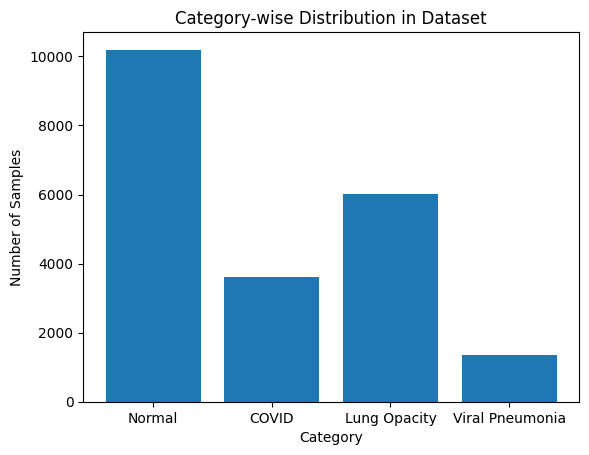

In [5]:
# Define the dataset sizes
dataset_sizes = [len_normal, len_covid, len_lung_opacity, len_viral_pneumonia]

# Define the categories
categories = ['Normal', 'COVID', 'Lung Opacity', 'Viral Pneumonia']

# Create a bar plot of the dataset sizes by category
plt.bar(categories, dataset_sizes)

# Set the plot title and axis labels
plt.title('Category-wise Distribution in Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Samples')

# Show the plot
plt.show()

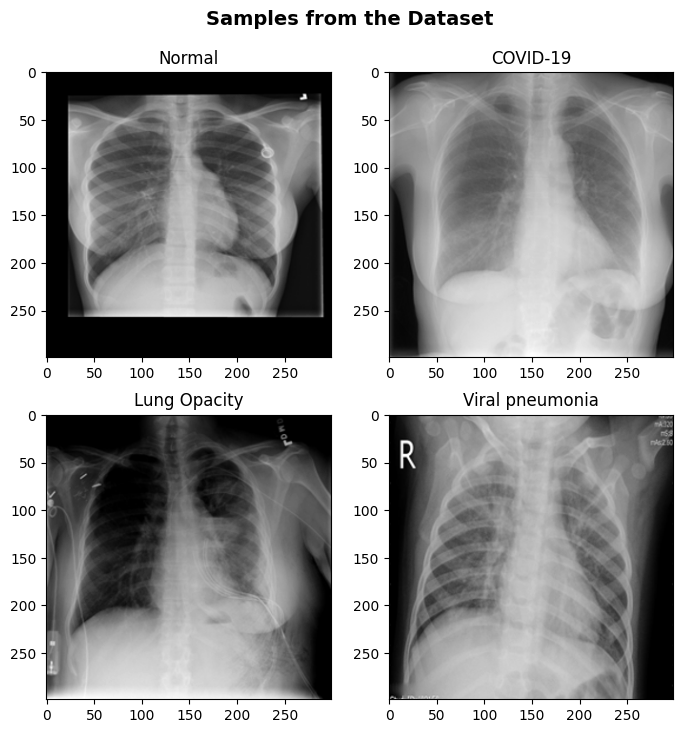

In [6]:
labels = ['Normal', 'COVID-19','Lung Opacity', 'Viral pneumonia']
img1 = path_normal+"/Normal-1.png"
img2 = path_covid+"/COVID-1994.png"
img3 = path_lung_opacity+"/Lung_Opacity-1.png"
img4 = path_viral_pneumonia + "/Viral Pneumonia-1.png"

imgs = [img1, img2, img3, img4]

fig, ax = plt.subplots(2, 2, figsize=(7,7))
ax = ax.ravel()
plt.tight_layout()

for i in range(0,4):
    ax[i].imshow(plt.imread(imgs[i]), cmap='gray')
    ax[i].set_title(labels[i])

plt.suptitle("Samples from the Dataset", fontsize=14, fontweight='bold',y=1.05)
plt.show()

In [7]:
from PIL import Image, ImageOps
def resize_image(imgpath):
    img = np.array(ImageOps.grayscale(Image.open(imgpath)).resize((150, 150), Image.ANTIALIAS))
    return img

In [8]:
import os
x_ = list()
y = list()

for i in os.listdir(path_normal):
    try:
        imgpath = path_normal+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir(path_covid):
    try:
        imgpath = path_covid+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir(path_lung_opacity):
    try:
        imgpath = path_lung_opacity+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(2)
    except:
        None  
for i in os.listdir(path_viral_pneumonia):
    try:
        imgpath = path_viral_pneumonia+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(3)
    except:
        None
x_ = np.array(x_)

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# Split the data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size=0.2, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=40)

# Convert the labels to one-hot encoded vectors
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Reshape the data to have a single color channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=40,
                    validation_data=(x_val, y_val))

Epoch 1/40
450/450 [==============================] - 10s 21ms/step - loss: 0.2557 - accuracy: 0.9000 - val_loss: 0.7215 - val_accuracy: 0.8189
Epoch 2/40
450/450 [==============================] - 8s 18ms/step - loss: 0.2178 - accuracy: 0.9168 - val_loss: 0.8646 - val_accuracy: 0.8224
Epoch 3/40
450/450 [==============================] - 8s 17ms/step - loss: 0.1918 - accuracy: 0.9236 - val_loss: 0.8402 - val_accuracy: 0.8224
Epoch 4/40
450/450 [==============================] - 9s 19ms/step - loss: 0.1894 - accuracy: 0.9268 - val_loss: 0.9644 - val_accuracy: 0.8268
Epoch 5/40
450/450 [==============================] - 8s 18ms/step - loss: 0.1747 - accuracy: 0.9316 - val_loss: 1.2225 - val_accuracy: 0.8059
Epoch 6/40
450/450 [==============================] - 8s 18ms/step - loss: 0.1895 - accuracy: 0.9227 - val_loss: 1.0782 - val_accuracy: 0.8169
Epoch 7/40
450/450 [==============================] - 10s 23ms/step - loss: 0.1685 - accuracy: 0.9340 - val_loss: 0.9315 - val_accuracy: 0.83

In [16]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


133/133 [==============================] - 1s 7ms/step - loss: 1.6657 - accuracy: 0.8160
Test Loss: 1.6656615734100342
Test Accuracy: 0.8159697651863098


In [29]:
from PIL import Image
import numpy as np

# Load and preprocess image
img = Image.open('F2.medium.jpg').convert('L')  # Convert to grayscale
img = img.resize((150, 150))
x = np.array(img)
x = np.expand_dims(x, axis=-1)  # Add channel dimension
# Predict class probabilities
y_pred = model.predict(x)

# Convert probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Print predicted class label
print('Predicted class:', y_pred)


InvalidArgumentError: ignored